# Implementing adaline in python

## Adaptive linear neurons (Adaline) and the convergence of learning


Another single-layer neural network after perceptrons.
The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and minimizing continuous loss functions

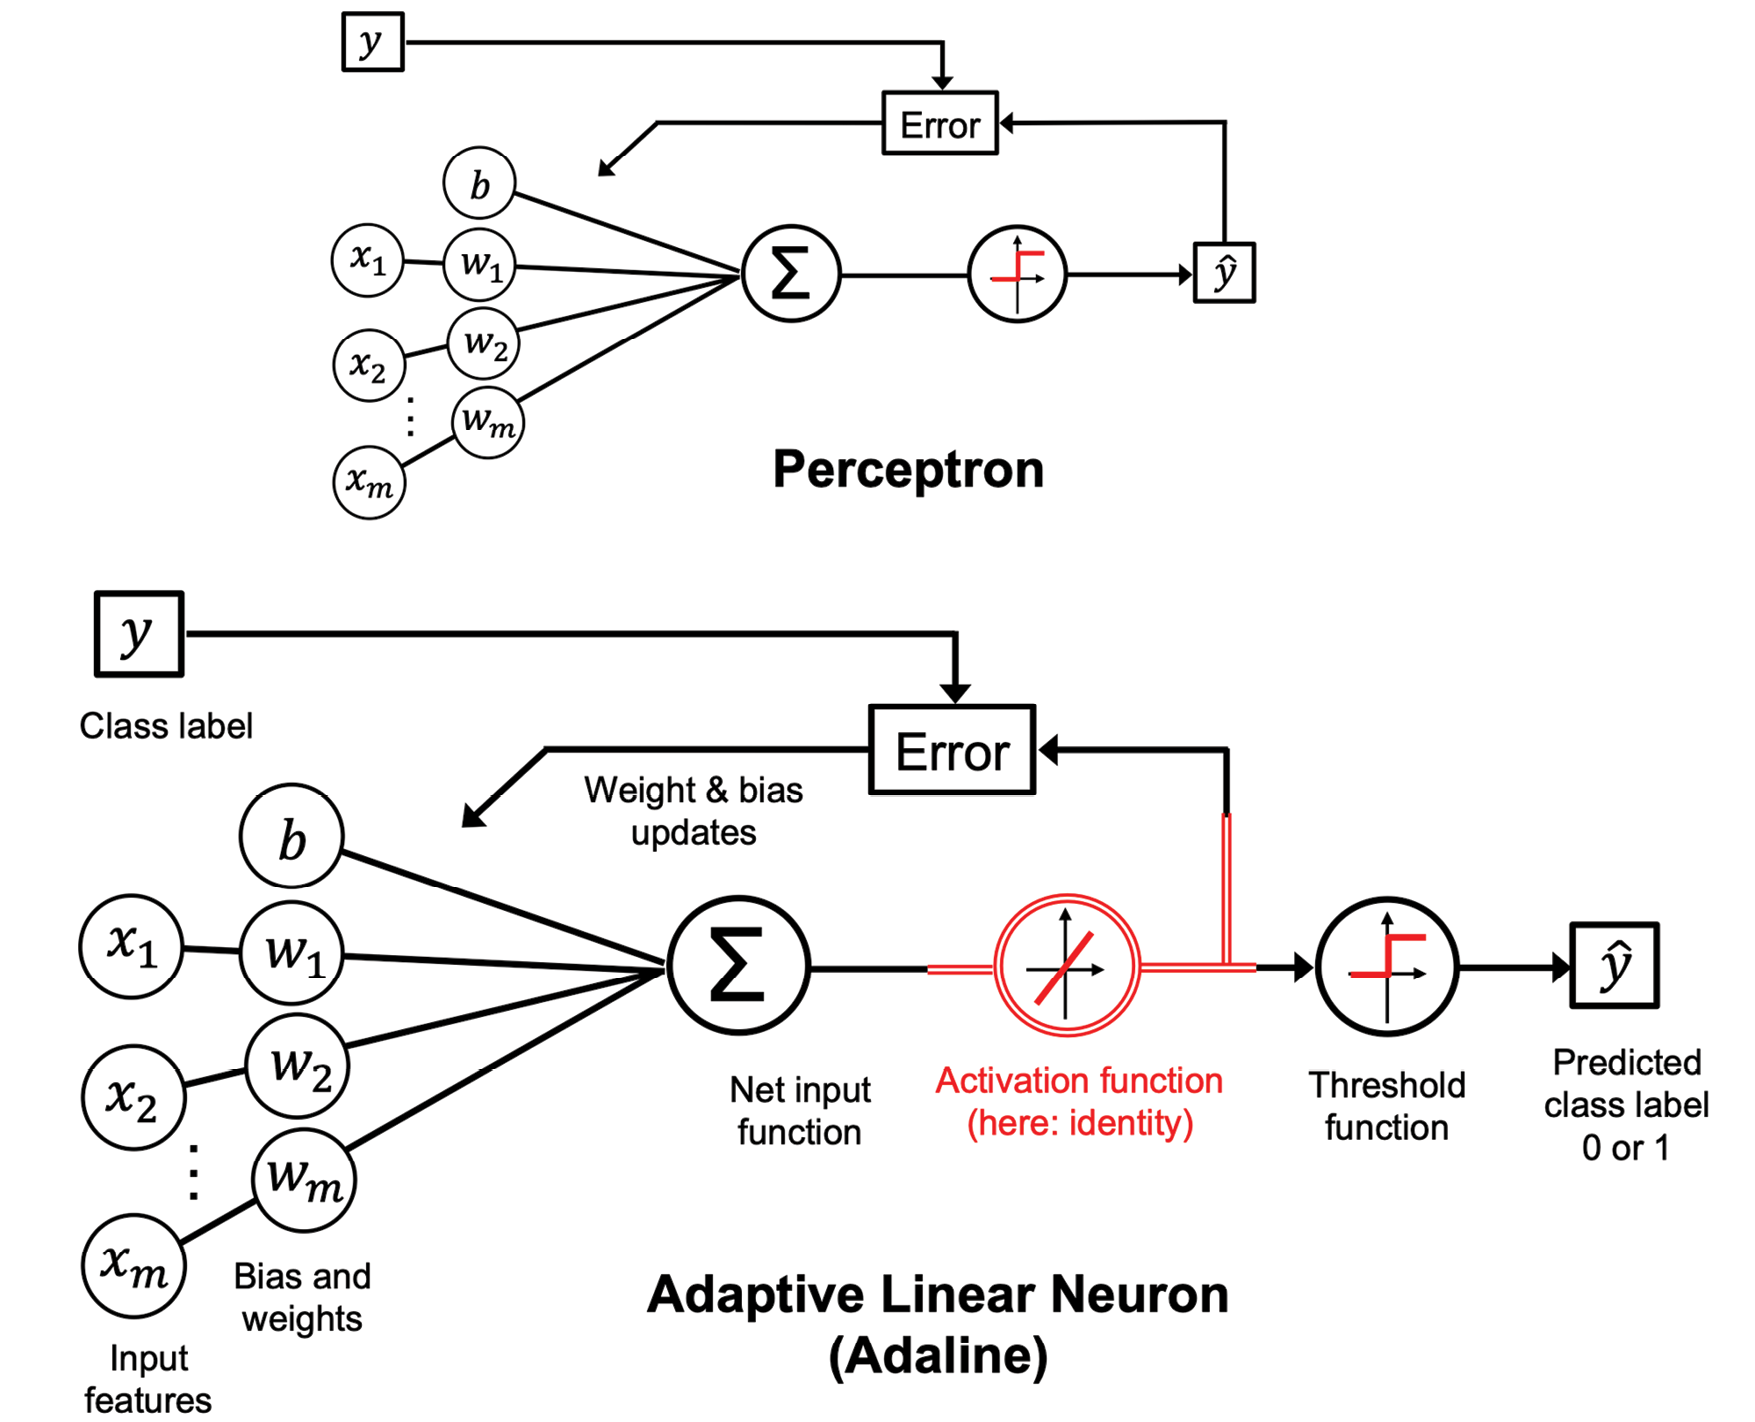


In [2]:
class AdalineGD:
    """
    Adaptive linear Neuron classifier
    
    Parameters
    ---------------
    eta: float
        learning rate 
    
    n_iter : int
        passes over the training dataset
        
    random_state : int
        random number generator seed for random weight initialisation
    
    Attributes
    -------------
    w_ : 1d array
        weights after fitting
        
    b_ : scalar
        bias unit after fitting
    
    losses_ : list
        mean squared error loss function value in each epoch
    """
    
    def __init__(self,eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self, X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_= rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_=np.float_(0.)
        self.losses_=[]
        
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output= self.activation(net_input)
            errors=(y-output)
            self.w_ +=self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ +=self.eta * 2.0 * errors.mean()
            loss= (errors**2).mean()
            self.losses_.append(loss)
        return self
            
    
    def net_input(self,X):
        return np.dot(X,self.w_)+ self.b_
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.5, 1,0)

    

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    
    markers=('o','s','^','v','<')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    x1_min, x1_max =X[:,0].min()-1,X[:,0].max()+1  # 0 is sepal length
    x2_min, x2_max =X[:,1].min()-1,X[:,1].max()+1  # 1 is petal length
    xx1,xx2= np.meshgrid(np.arange(x1_min, x1_max,resolution),
                         np.arange(x2_min, x2_max,resolution)) # creating co-ordinates 
    lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) ## co-ordinates predictions
    lab= lab.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx2.max()) # x axis limit
    plt.ylim(xx2.min(), xx2.max()) # y axiz limit
    
    #plot class examples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')

In [4]:
import pandas as pd
import numpy as np

path= 'IRIS.csv'
column_dtype = {0: 'float', 1: 'float', 2: 'float', 3: 'float'}

# Read the CSV and apply the dtype conversion
df = pd.read_csv(path, header=None, skiprows=1, dtype=column_dtype, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',0,1)

#extract sepal and petal length 
X=df.iloc[0:100,[0,2]].values

### Lets take eta=0.1 and eta=0.0001 to check how the convergence takes place in both cases

Text(0.5, 1.0, 'Adaline - LR 0.1')

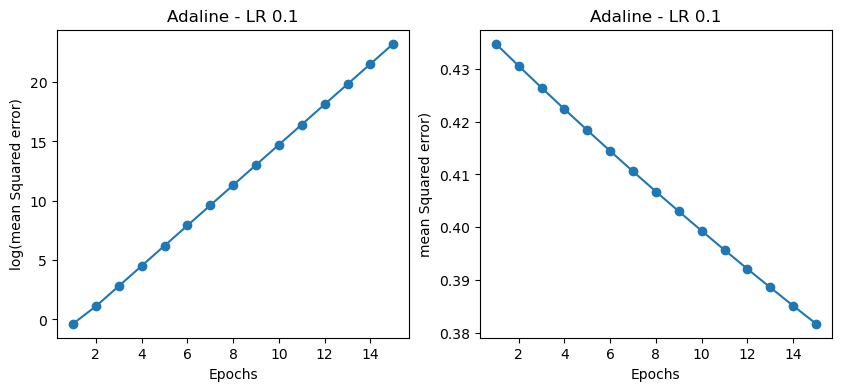

In [12]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(mean Squared error)')
ax[0].set_title('Adaline - LR 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('mean Squared error)')
ax[1].set_title('Adaline - LR 0.1')

### Improving gradient descent through feature scaling

<b>Standardization</b> shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1 (unit variance).


In [17]:
# achieve standardisation via numpy
X_std=np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0]
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1]


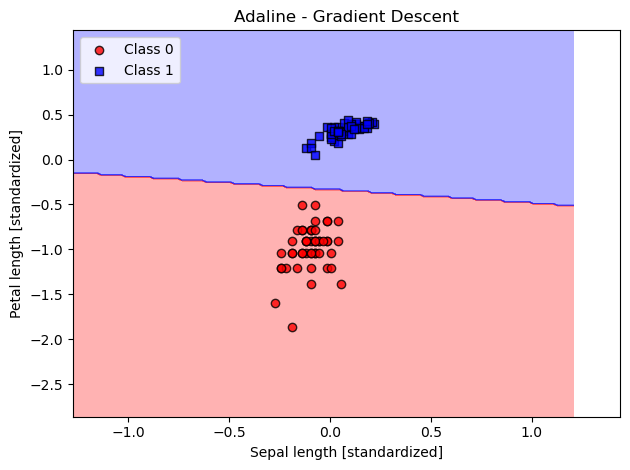

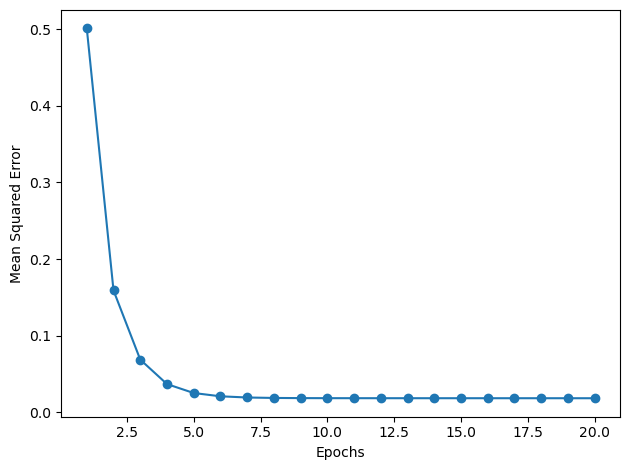

In [22]:
#train adaline on standardised data
ada_gd= AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1,len(ada_gd.losses_)+1),ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

<font size="3">  
    Even though points are classified correctly , there is still loss of 0.01854833521538247. 
</font>

In [25]:
ada_gd.losses_[len(ada_gd.losses_)-1]

0.01854833521538247

## Large scale machine learning and stochastic gradient descent

1. SGD is a faster, more scalable alternative to full batch gradient descent but introduces noise due to updating the weights after every training example.
2. Because SGD updates the weights using a single training example at a time, each gradient estimate is based on just one point in the dataset. As a result, the gradient doesn’t accurately reflect the overall error surface of the entire dataset. Instead, the updates can be influenced by the noise or outliers in the individual training examples.
3. To obtain satisfying results via SGD, it is important to present training data in a random order; also, we want to shuffle the training dataset for every epoch to prevent cycles.

Adjust learning rate while training :

C1/(no. of iteration + C2)

In [29]:
class AdalineSGD:
    """
    Adaptive linear neuron classifier
    
    parameters
    --------------
    
    eta: float
        learning rate
    n_iter : int
        passes over the training dataset
    shuffle : bool (default: True)
        shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Random number generator seed for random weight initialisation
    
    Attributes
    -------------
    w_ : 1d array
        weights after fitting
    b_ : scalar
        Bias unit after fitting
    losses_ : list
        mean squared error loss function value averaged over all training examples in each epoch
    
    
    """
    
    def __init__(self,eta=0.01, n_iter=10, shuffle= True, random_state=None):
        self.eta=eta
        self.n_iter=n_iter
        self.shuffle=shuffle
        self.random_state=random_state
    
    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.losses_=[]
        for i in range(self.n_iter):
            if self.shuffle:
                X,y=self._shuffle(X,y)
            losses=[]
            for xi,target in zip(X,y):
                losses.append(self._update_weights(xi,target))
            avg_loss=np.mean(losses)
            self.losses_.append(avg_loss)
            
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self
        
    
    def _initialize_weights(self,m):
        """ Inititalise weights to small random numbers"""
        self.rgen=np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_=np.float_(0.)
        self.w_initialized=True
        
    def _shuffle(self,X,y):
        r=self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _update_weights(self,xi,target):
        """ Apply adaline learning rule to update the weights """
        output= self.activation(self.net_input(xi))
        error=(target-output)
        self.w_+=self.eta * 2.0 * xi * (error)
        self.b_+=self.eta * 2.0 * (error)
        loss=error**2
        return loss
    
        
     
    def net_input(self,X):
        return np.dot(X,self.w_)+self.b_
    
    def activation(self,X):
        return X

    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >=0.5, 1,0)

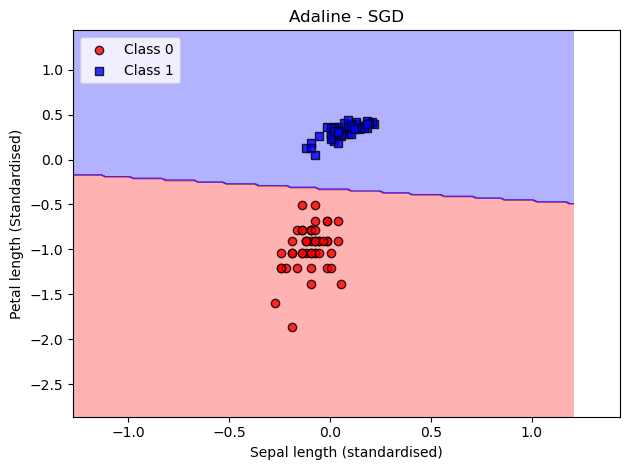

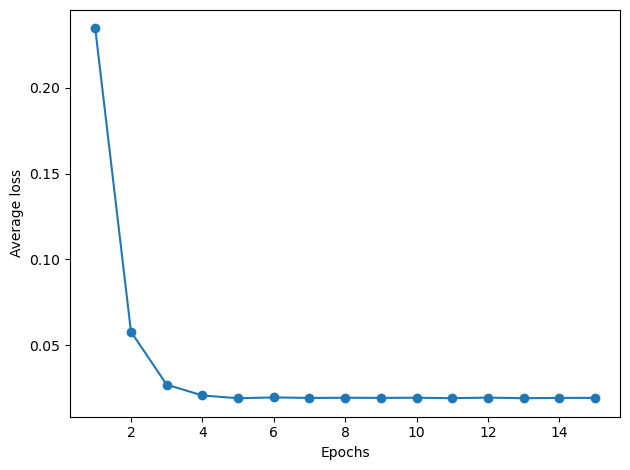

In [30]:
ada_sgd=AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada_sgd)
plt.title('Adaline - SGD')
plt.xlabel('Sepal length (standardised)')
plt.ylabel('Petal length (Standardised)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_)+1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()
